<a id="Import"></a>
# <p style="background-color: #0093af; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Diabetes Detection Model</p>

# <font color='DarkSlateGrey'>⚑ Importing Libraries</font>

In [1]:
# Basic Libraries
import numpy as np # Numerical Python - arrays, matrices, mathematical functions
import pandas as pd
import seaborn as sns #  data visualization - statistical graphics
import matplotlib.pyplot as plt #  data visualization - plot customization

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# <font color='DarkSlateGrey'>⚑ Reading and exploring the dataset</font>

In [2]:
data = pd.read_csv('Diabetes Dataset_Training Part.csv')

# Comma-Separated Values (CSV)
# Age  ,  Name     ,  Target
# 21   ,  John     ,   200
# 22   ,  Sara     ,   500
# 23   ,  Olivia   ,   700

In [3]:
data.shape # Dimensions (rows, columns)

(1949, 9)

In [4]:
data.head(10) # first 10 rows/records

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# 1- Pregnancies (للتعبير عن عدد حالات الحمل)           2- Glucose (مستوى الجلوكوز في الدم)
# 3- BloodPressure (قياس ضغط الدم)                   4- SkinThickness (سماكة الجلد)
# 5- Insulin (مستوى الأنسولين في الدم)                6- BMI (مؤشر كتلة الجسم)
# 7- DiabetesPedigreeFunction (نسبة مرض السكري)     8- Age (العمر)
# 9- Outcome (مريض | مش مريض)

In [6]:
data.tail(10) # last 10 rows/records

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1939,1,83,68,0,0,18.2,0.624,27,0
1940,6,124,72,0,0,27.6,0.368,29,1
1941,2,99,0,0,0,22.2,0.108,23,0
1942,5,109,62,41,129,35.8,0.514,25,1
1943,6,107,88,0,0,36.8,0.727,31,0
1944,6,87,80,0,0,23.2,0.084,32,0
1945,3,129,64,29,115,26.4,0.219,28,1
1946,1,100,66,29,196,32.0,0.444,42,0
1947,2,94,68,18,76,26.0,0.561,21,0
1948,0,146,82,0,0,40.5,1.781,44,0


In [7]:
data.dtypes

Preg                          int64
Glucose                       int64
BPressure                     int64
SThickness                    int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# <font color='DarkSlateGrey'>⚑ Handling Missing Values</font>

In [8]:
if data.isnull().values.any():
    print('Unfortunately, there are missing values in the dataset\n')
    data.dropna(inplace=True)
    print('Shape : ', data.shape) 
else:
    print('Fortunately, there aren\'t missing values in the dataset.')

Fortunately, there aren't missing values in the dataset.


# <font color='DarkSlateGrey'>⚑ Handling Outliers</font>

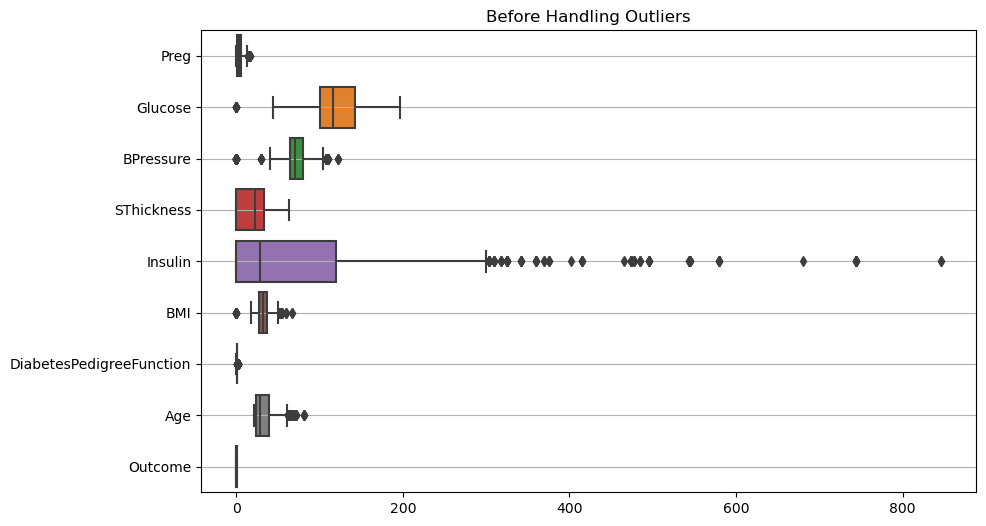

In [9]:
# Outliers = Unusual Values قيم متطرفة

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h') # horizontal
plt.title('Before Handling Outliers')
plt.grid(axis='y')
plt.show()

# <font color='DarkSlateGrey'>⚑ Using : IQR</font>

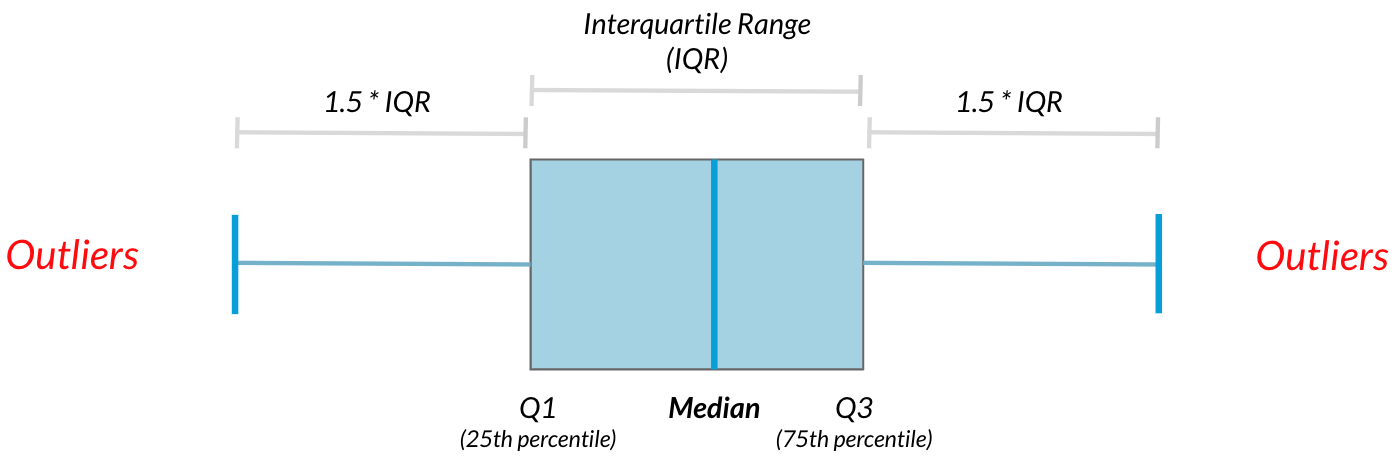

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (1595, 9) 



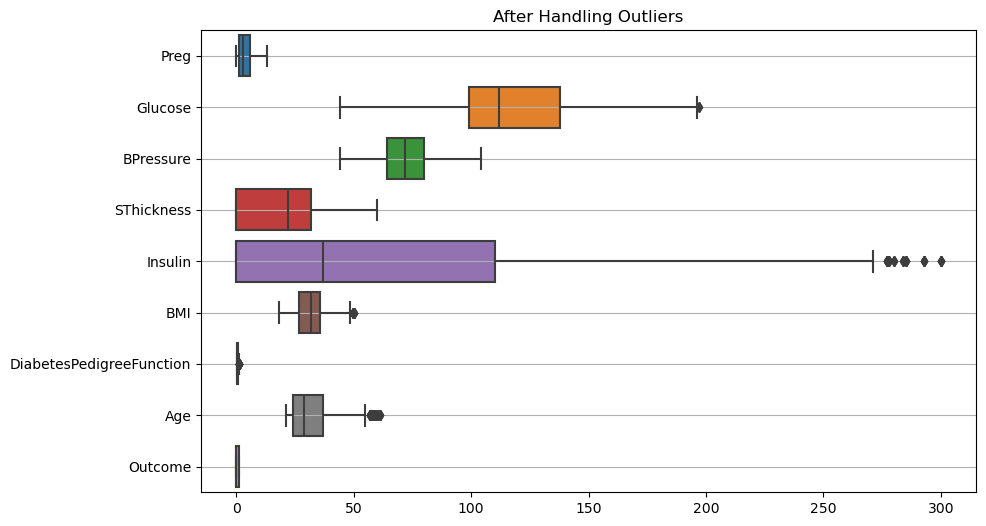

In [10]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Check if there are any outliers
if outliers.any().any():
    print('Outliers detected in the dataset. Removing them...')
    
    # Remove outliers
    data = data[~outliers.any(axis=1)]
    data.reset_index(drop=True, inplace=True)
    
    print('Outliers removed. Data shape:', data.shape, '\n')

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, orient='h') # horizontal
    plt.title('After Handling Outliers')
    plt.grid(axis='y')
    plt.show()
else:
    print('No outliers detected in the dataset.')

In [11]:
data.columns

Index(['Preg', 'Glucose', 'BPressure', 'SThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color='DarkSlateGrey'>⚑ Analysis and exploration of categories of the "Outcome" feature</font>

In [12]:
# check labels in "Outcome" feature
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [13]:
data['Outcome'].value_counts()

Outcome
0    1023
1     572
Name: count, dtype: int64

# <font color='DarkSlateGrey'>⚑ Encoding</font>

In [14]:
data['Outcome'].replace({0:"They don't have diabetes", 1:"They have diabetes"}, inplace=True)

In [15]:
data['Outcome'].value_counts()

Outcome
They don't have diabetes    1023
They have diabetes           572
Name: count, dtype: int64

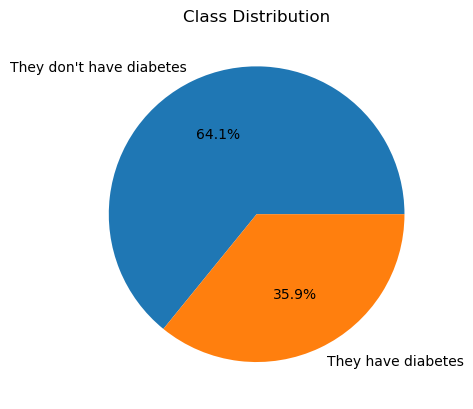

In [16]:
plt.pie(data.Outcome.value_counts().values , labels=data.Outcome.value_counts().index,autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [17]:
data['Outcome'].replace({"They don't have diabetes" : 0, "They have diabetes" : 1}, inplace=True)

In [18]:
data.head()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


# <font color='DarkSlateGrey'>⚑ The Correlations between features</font>

In [19]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

data.corr()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Preg,1.000000,0.223989,0.216325,-0.064008,-0.096591,0.120975,0.048574,0.649665,0.248378
Glucose,0.223989,1.000000,0.287373,-0.008498,0.254790,0.242670,0.049341,0.285438,0.465094
BPressure,0.216325,0.287373,1.000000,0.055151,0.018250,0.349570,-0.011516,0.368813,0.184187
SThickness,-0.064008,-0.008498,0.055151,1.000000,0.498133,0.379566,0.074872,-0.132153,0.028317
Insulin,-0.096591,0.254790,0.018250,0.498133,1.000000,0.222661,0.133848,-0.015656,0.110431
BMI,0.120975,0.242670,0.349570,0.379566,0.222661,1.000000,0.084645,0.122952,0.284287
DiabetesPedigreeFunction,0.048574,0.049341,-0.011516,0.074872,0.133848,0.084645,1.000000,0.047793,0.197236
Age,0.649665,0.285438,0.368813,-0.132153,-0.015656,0.122952,0.047793,1.000000,0.274999
Outcome,0.248378,0.465094,0.184187,0.028317,0.110431,0.284287,0.197236,0.274999,1.000000


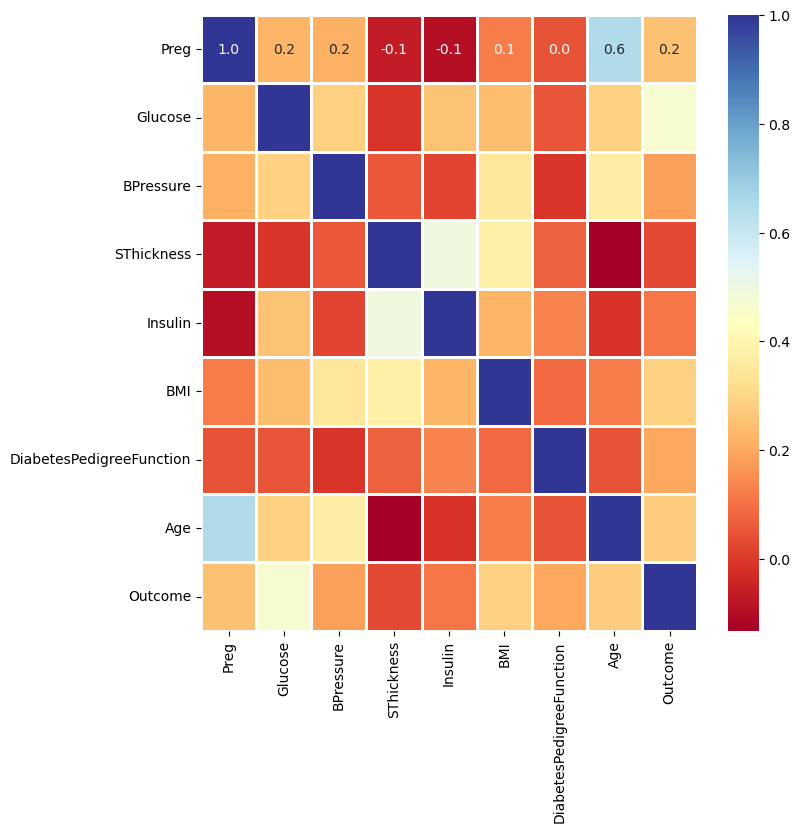

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='RdYlBu')
plt.show()

# <font color='DarkSlateGrey'>⚑ The correlation between each feature and the "Outcome"</font>

In [21]:
corr = data[['Preg', 'Glucose', 'BPressure', 'SThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome']].corr()['Outcome'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,Outcome
Outcome,1.000000
Glucose,0.465094
BMI,0.284287
Age,0.274999
Preg,0.248378
DiabetesPedigreeFunction,0.197236
BPressure,0.184187
Insulin,0.110431
SThickness,0.028317


# <font color='DarkSlateGrey'>⚑ Dropping feature/s based on the correlation</font>

In [22]:
data.drop(['SThickness'], inplace=True, axis=1)

In [23]:
data.head() # Default : first 5 rows

,Preg,Glucose,BPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,5,116,74,0,25.6,0.201,30,0


In [24]:
data.tail() # Default : last 5 rows

,Preg,Glucose,BPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1590,6,107,88,0,36.8,0.727,31,0
1591,6,87,80,0,23.2,0.084,32,0
1592,3,129,64,115,26.4,0.219,28,1
1593,1,100,66,196,32.0,0.444,42,0
1594,2,94,68,76,26.0,0.561,21,0


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,1595.0,3.770533,3.081292,0.000,1.000,3.000,6.000,13.000
Glucose,1595.0,118.452038,29.177593,44.000,99.000,112.000,138.000,197.000
BPressure,1595.0,71.889028,11.000837,44.000,64.000,72.000,80.000,104.000
Insulin,1595.0,63.586834,78.347922,0.000,0.000,37.000,110.000,300.000
BMI,1595.0,31.864326,6.573203,18.200,26.800,32.000,35.800,50.000
DiabetesPedigreeFunction,1595.0,0.438347,0.250749,0.078,0.252,0.368,0.597,1.224
Age,1595.0,31.518495,9.617014,21.000,24.000,29.000,37.000,61.000
Outcome,1595.0,0.358621,0.479746,0.000,0.000,0.000,1.000,1.000


In [26]:
data.shape # Dimensions (rows, columns)

(1595, 8)

# <font color='DarkSlateGrey'>⚑ Modeling</font>

<center>
    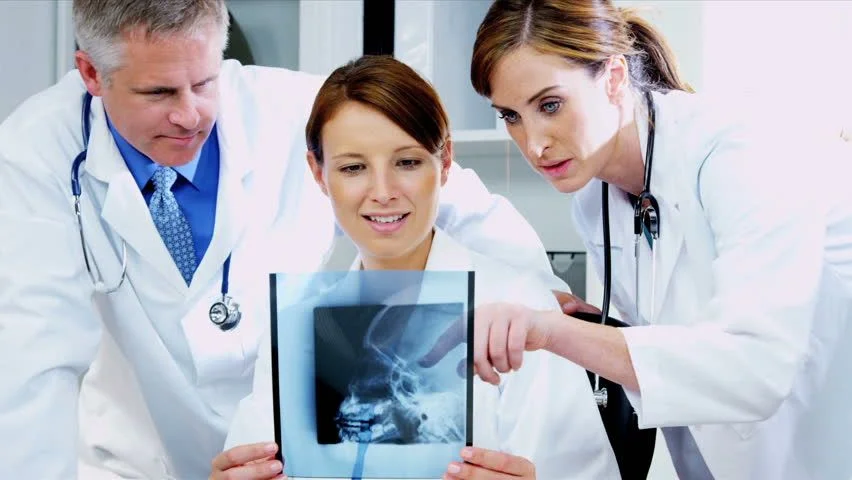
  </center>
p>r>

# <font color='DarkSlateGrey'>⚑ Splitting the data and target</font>

In [27]:
# X Data
X = data.drop(['Outcome'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['Outcome']
print('y shape is : ' , y.shape)

X shape is :  (1595, 7)

y shape is :  (1595,)


# <font color='DarkSlateGrey'>⚑ Train Test Split</font>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1276, 7)
X_test shape is  (319, 7)
y_train shape is  (1276,)
y_test shape is  (319,)


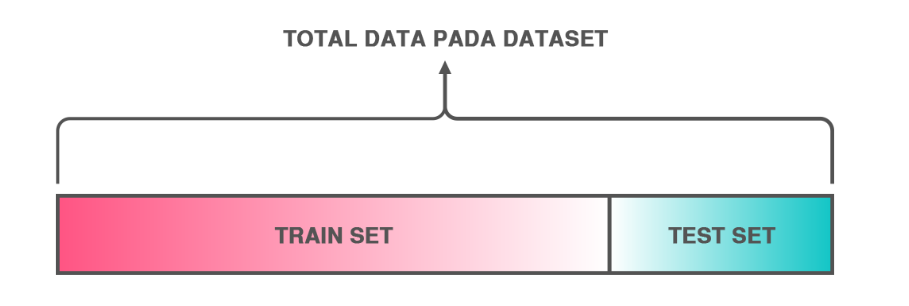

# <font color='DarkSlateGrey'>⚑ Data Scaling / Feature Scaling</font>

<center>
    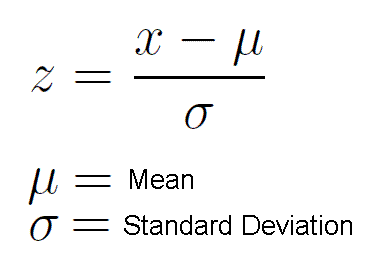
  </center>
p>r>

In [29]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <font color='DarkSlateGrey'>⚑ Applying "Support Vector Machine" Algorithm</font>

In [30]:
Model_SVC = SVC()
Model_SVC.fit(X_train_scaled, y_train)
y_pred_SVC = Model_SVC.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_SVC.score(X_train_scaled, y_train)
Test_Accuracy = Model_SVC.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

# Gap = 0.16

Training accuracy: 87.93 %
Testing accuracy: 88.09 %


# <font color='DarkSlateGrey'>⚑ Model Evaluation</font>

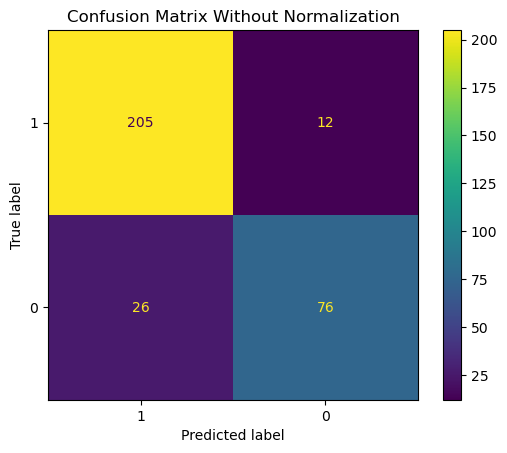

In [31]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_SVC)
ConfusionMatrixDisplay(CM, display_labels=data['Outcome'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [32]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       217
           1       0.86      0.75      0.80       102

    accuracy                           0.88       319
   macro avg       0.88      0.84      0.86       319
weighted avg       0.88      0.88      0.88       319



In [33]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print(f'➤➤➤ Accuracy Score : {Accuracy_SVC * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_SVC = precision_score(y_test, y_pred_SVC)
print(f'➤➤➤ Precision Score : {Precision_SVC * 100 : .2f} %\n')


# Recall/Sensitivity = TP / (TP + FN)
Recall_SVC = recall_score(y_test, y_pred_SVC)
print(f'➤➤➤ Recall Score : {Recall_SVC * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_SVC = f1_score(y_test, y_pred_SVC)
print(f'➤➤➤ F1 Score : {F1_Score_SVC * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  88.09 %

➤➤➤ Precision Score :  86.36 %

➤➤➤ Recall Score :  74.51 %

➤➤➤ F1 Score :  80.00 %



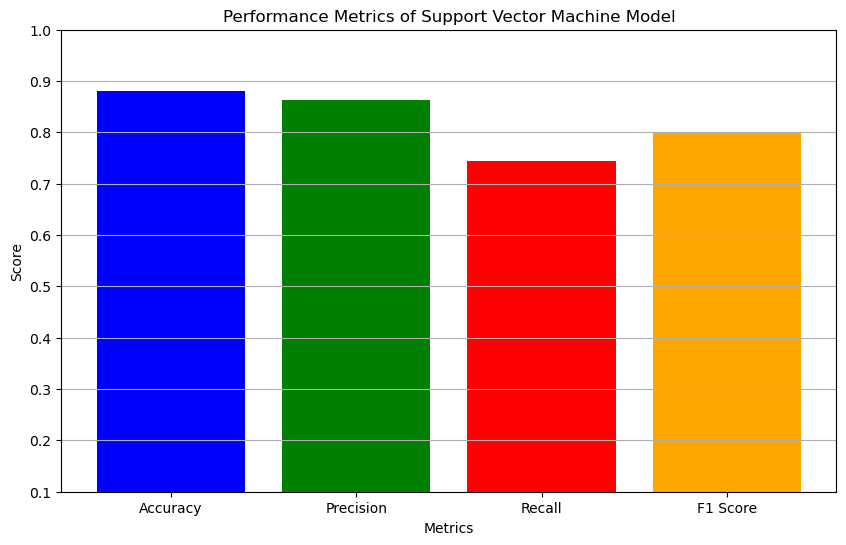

In [34]:
# Define the evaluation metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [Accuracy_SVC, Precision_SVC, Recall_SVC, F1_Score_SVC]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Support Vector Machine Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(axis='y', alpha=1)
plt.show()

# <font color='DarkSlateGrey'>⚑ Applying "Decision Tree" Algorithm</font>

In [35]:
Model_DT = DecisionTreeClassifier(max_depth=10)
Model_DT.fit(X_train_scaled, y_train)
y_pred_DT = Model_DT.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_DT.score(X_train_scaled, y_train)
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

# Gap = 0.00

Training accuracy: 98.67 %
Testing accuracy: 98.43 %


# <font color='DarkSlateGrey'>⚑ Model Evaluation</font>

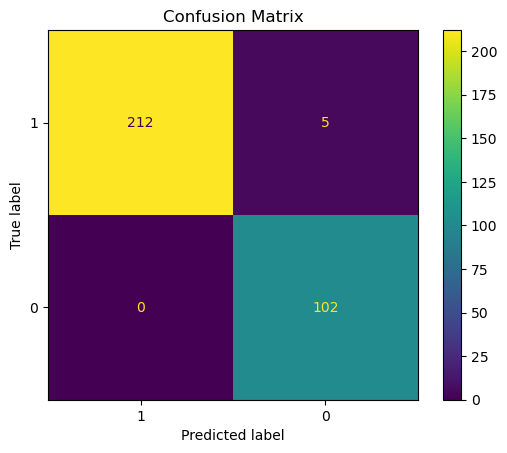

In [36]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['Outcome'].unique()).plot()
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       217
           1       0.95      1.00      0.98       102

    accuracy                           0.98       319
   macro avg       0.98      0.99      0.98       319
weighted avg       0.99      0.98      0.98       319



In [38]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall/Sensitivity = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  98.43 %

➤➤➤ Precision Score :  95.33 %

➤➤➤ Recall Score :  100.00 %

➤➤➤ F1 Score :  97.61 %



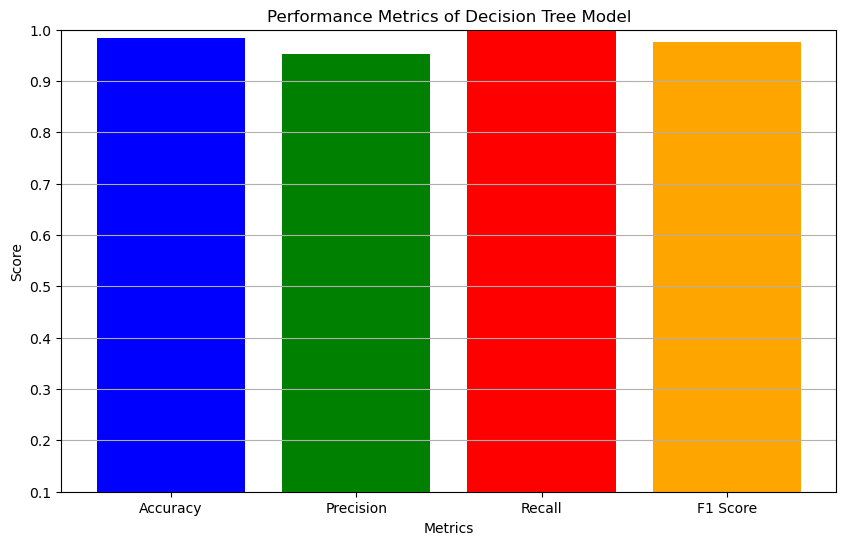

In [39]:
# Define the evaluation metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Decision Tree Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(axis='y', alpha=1)
plt.show()

# <font color='DarkSlateGrey'>⚑ Applying "Random Forest" Algorithm</font>

In [40]:
Model_RF = RandomForestClassifier(random_state=42, max_depth=7)
Model_RF.fit(X_train_scaled, y_train)
y_pred_RF = Model_RF.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_RF.score(X_train_scaled, y_train)
Test_Accuracy = Model_RF.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

# Gap = 0.00

Training accuracy: 97.49 %
Testing accuracy: 95.61 %


# <font color='DarkSlateGrey'>⚑ Model Evaluation</font>

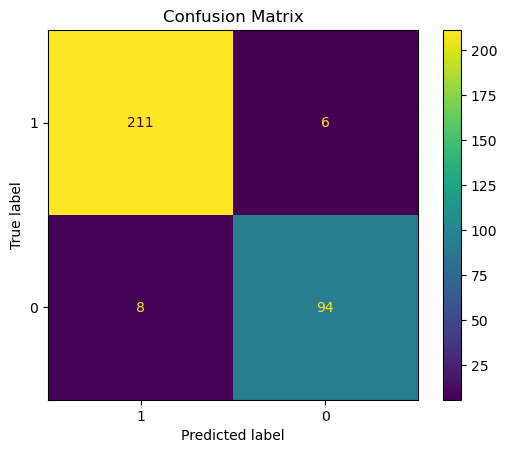

In [41]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_RF)
ConfusionMatrixDisplay(CM, display_labels=data['Outcome'].unique()).plot()
plt.title('Confusion Matrix')
plt.show()

In [42]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       217
           1       0.94      0.92      0.93       102

    accuracy                           0.96       319
   macro avg       0.95      0.95      0.95       319
weighted avg       0.96      0.96      0.96       319



In [43]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'➤➤➤ Accuracy Score : {Accuracy_RF * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_RF = precision_score(y_test, y_pred_RF)
print(f'➤➤➤ Precision Score : {Precision_RF * 100 : .2f} %\n')


# Recall/Sensitivity = TP / (TP + FN)
Recall_RF = recall_score(y_test, y_pred_RF)
print(f'➤➤➤ Recall Score : {Recall_RF * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_RF = f1_score(y_test, y_pred_RF)
print(f'➤➤➤ F1 Score : {F1_Score_RF * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  95.61 %

➤➤➤ Precision Score :  94.00 %

➤➤➤ Recall Score :  92.16 %

➤➤➤ F1 Score :  93.07 %



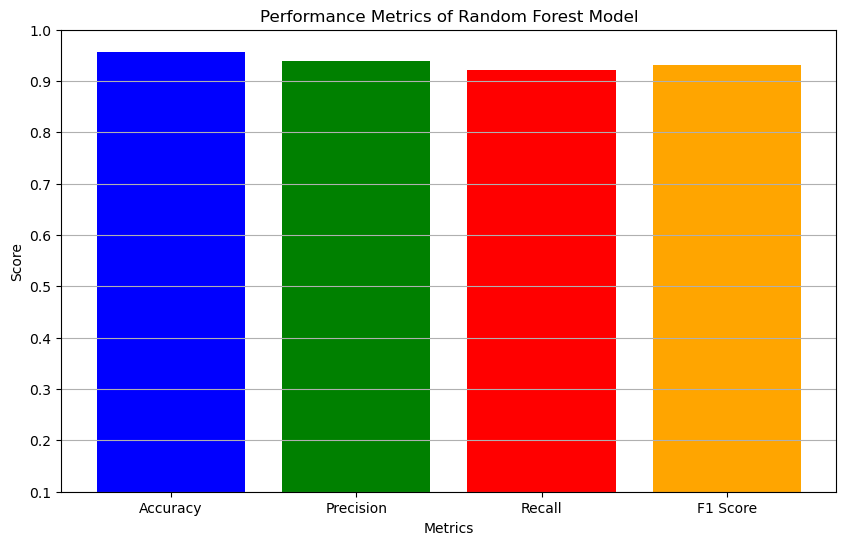

In [44]:
# Define the evaluation metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [Accuracy_RF, Precision_RF, Recall_RF, F1_Score_RF]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Random Forest Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(axis='y', alpha=1)
plt.show()

# <font color='DarkSlateGrey'>⚑ Final Evaluation</font>

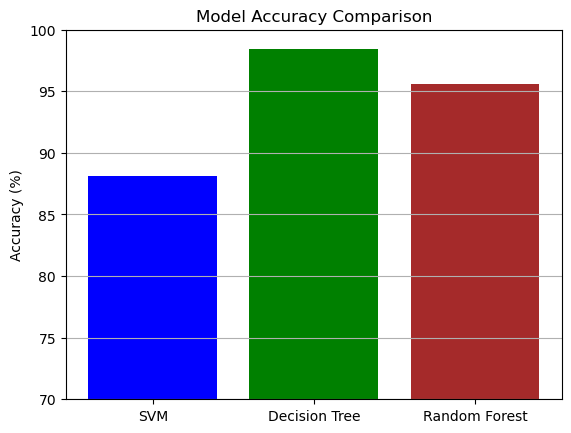

In [45]:
Classifiers = ['SVM', 'Decision Tree', 'Random Forest']
Accuracies = [(Accuracy_SVC * 100), (Accuracy_DT * 100), (Accuracy_RF * 100)]
plt.bar(Classifiers, Accuracies, color=['blue', 'green', 'brown'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(70, 100)
plt.grid(axis='y', alpha=1)
plt.show()